#Observation

#1 Closer you get to the equater the hotter the temperature is.  This can be seen in the graph titled 'City Latitude v. Max Temperature'.  When viewing the graph you can see on the x-axis that the closer you are to zero the higher the max temperature is. 

#2 Wind speed stays at 20mph or less for most of the sample cities.  This can be seen in the graph titled 'City Latitude v Wind Speed'. When looking at the graph you can see on the y-axis at 20mph that most of the dots are below 20mph. 

#3 

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [33]:
#import api_key
from config import api_key

In [34]:
#from citipy import citipy
from citipy import citipy
temp = 'imperial'
url='http://api.openweathermap.org/data/2.5/weather?'

In [35]:
output_data ='Output/weather.csv'

In [36]:
#one call to get the variable names for the for loop
#city = 'albany'
query_url = f'{url}appid={api_key}&units={temp}&q='
#response=requests.get(querl_url).json()
#response

In [37]:
#range of lat and long
lat = (-90,90)
long = (-180,180)

In [38]:
lat_longs = []
cities = []

lats = np.random.uniform(lat[0],lat[1],size=1500)
longs = np.random.uniform(long[0],long[1],size=1500)
lat_longs = zip(lats, longs)

for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

614

In [39]:
cities

['sugod',
 'carnarvon',
 'salalah',
 'rikitea',
 'dikson',
 'torbay',
 'chumikan',
 'grand gaube',
 'faanui',
 'barrow',
 'malkapur',
 'talnakh',
 'borama',
 'mataura',
 'tuktoyaktuk',
 'hermanus',
 'sao miguel do araguaia',
 'campoverde',
 'mar del plata',
 'poum',
 'catamarca',
 'provideniya',
 'bluff',
 'hilo',
 'belushya guba',
 'portland',
 'vestmannaeyjar',
 'lima',
 'yarim',
 'devils lake',
 'pangoa',
 'bontang',
 'new norfolk',
 'ushuaia',
 'hobbs',
 'kegayli',
 'tsihombe',
 'dekoa',
 'avarua',
 'taolanaro',
 'busselton',
 'gizo',
 'kapaa',
 'dakar',
 'asau',
 'chipinge',
 'alta floresta',
 'chitral',
 'east london',
 'cayenne',
 'sao filipe',
 'vaini',
 'cidreira',
 'lorengau',
 'haines junction',
 'alamogordo',
 'velasco ibarra',
 'tasiilaq',
 'nivala',
 'kenai',
 'zacualpan',
 'saurimo',
 'albany',
 'vaitupu',
 'cherskiy',
 'port pirie',
 'sitka',
 'hithadhoo',
 'port elizabeth',
 'illoqqortoormiut',
 'brae',
 'constitucion',
 'sedelnikovo',
 'saint-joseph',
 'bredasdorp',
 

In [40]:
#may need to add this time.sleep(50) inorder to not get blocked by weather api
cities_two = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
country = []

#count quantities to make sure group not over 5
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url+city).json()
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        if count_one >48:
            count_one =1
            set_one+=1
            cities_two.append(city)
        else:
            count_one +=1
            cities_two.append(city)
        print(f'{count_one} of {set_one}|{city}')
    except:
        print('Not found')


Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found


In [13]:
#datacheck
len(cities_two)

580

In [14]:
#datacheck
len(cloudiness)

580

In [15]:
#datacheck
len(dates)

580

In [16]:
#create dictionary and then pd.dataframe
weather_dic={'City':cities_two,'Lat':lats,'Lng':lngs,'Max Temp':max_temps,'Humidity':humidity,
            'Cloudiness':cloudiness,'Wind Speeds':wind_speeds,'Country':country,'Date':dates}
weather =pd.DataFrame(weather_dic)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date
0,clyde river,70.47,-68.59,15.80,85,75,16.11,CA,1604081632
1,manta,-0.95,-80.73,78.80,74,40,12.75,EC,1604081632
2,saskylakh,71.92,114.08,-2.06,85,31,6.08,RU,1604081632
3,phenix city,32.47,-85.00,64.00,48,1,12.75,US,1604081632
4,bang saphan,11.21,99.51,75.29,90,95,1.59,TH,1604081632


In [18]:
weather.to_csv(output_data)

In [19]:
#data check to make sure all date for each city was added and some descriptive stats
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.458379,15.649448,58.824207,71.474138,55.518966,8.084172,1.604082e+09
std,33.658564,90.496611,23.163393,22.174477,37.331517,5.929371,6.069237e+01
min,-54.800000,-175.200000,-11.740000,1.000000,0.000000,0.430000,1.604081e+09
25%,-6.487500,-65.190000,44.535000,59.000000,20.000000,3.505000,1.604082e+09
50%,22.860000,18.350000,63.000000,78.000000,67.000000,6.520000,1.604082e+09
75%,49.692500,99.677500,77.957500,89.000000,90.000000,11.010000,1.604082e+09
max,78.220000,179.320000,97.340000,100.000000,100.000000,34.450000,1.604082e+09


In [17]:
#not cities with humidity over 100

weather.loc[weather['Humidity']>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date


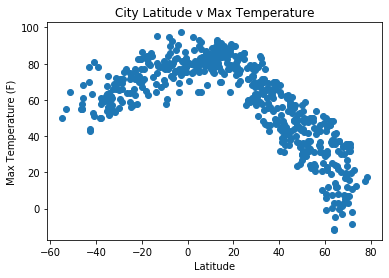

In [20]:
#scatter plot latitude vs temperatur plot
plt.scatter(weather['Lat'], weather['Max Temp'])
plt.title('City Latitude v Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

print('Scatter plot above shows the relationship between latitude and max temperature.')

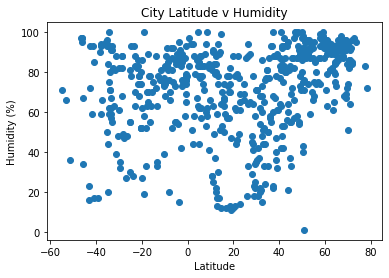

In [21]:
#scatter latitude vs humidity plot
plt.scatter(weather['Lat'], weather['Humidity'])
plt.title('City Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print('Scatter plot above shows the relationship between latitude and humidity.')

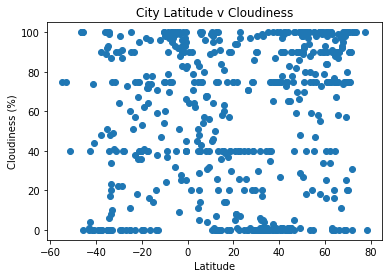

In [22]:
#scatter latitude vs. cloudiness plot
plt.scatter(weather['Lat'],weather['Cloudiness'])
plt.title('City Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print('Scatter plot above shows the relationship between latitude and cloudiness.')

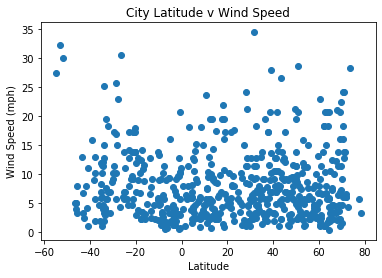

In [23]:
#scatter latitude vs. wind speed plot
plt.scatter(weather['Lat'],weather['Wind Speeds'])
plt.title('City Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

print('Scatter plot above shows the relationship between latitude and wind speed.')

In [24]:
weather.dtypes

City            object
Lat            float64
Lng            float64
Max Temp       float64
Humidity         int64
Cloudiness       int64
Wind Speeds    float64
Country         object
Date             int64
dtype: object

In [69]:
north = weather.loc[(weather['Lat'].astype(float)>=0.0),:]
south = weather.loc[(weather['Lat'].astype(float)<0.0),:]

In [70]:
north.count()


City           401
Lat            401
Lng            401
Max Temp       401
Humidity       401
Cloudiness     401
Wind Speeds    401
Country        401
Date           401
dtype: int64

In [71]:
south.count()

City           179
Lat            179
Lng            179
Max Temp       179
Humidity       179
Cloudiness     179
Wind Speeds    179
Country        179
Date           179
dtype: int64

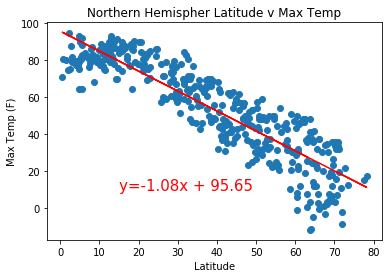

In [72]:
#linear regression Northern Hemisphere -Max temp vs Latitude
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
#stay
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemispher Latitude v Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and max temperature.')

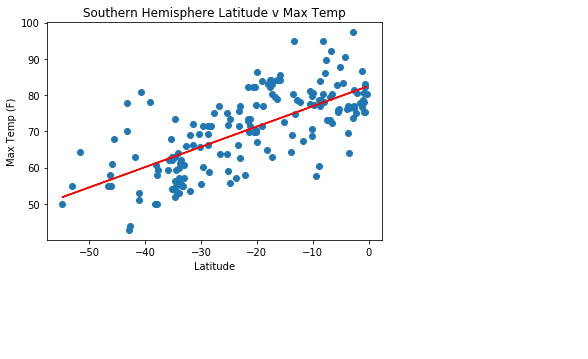

In [73]:
#linear regression southern hemisphere -max temp vs latitude
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and max temperature.')

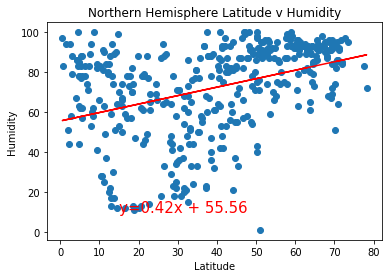

In [74]:
#linear regression northern hemisphere latitude v humidity
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and humidity.')

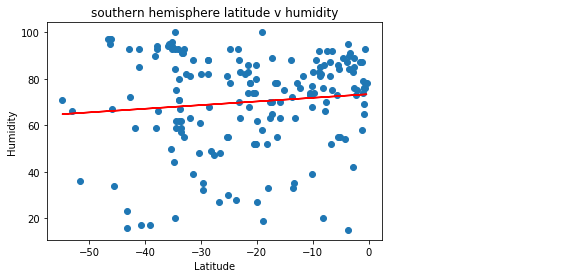

In [75]:
#linear regression southern hemisphere latitude v humidity
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('southern hemisphere latitude v humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and humidity.')

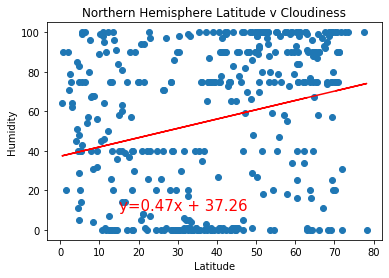

In [77]:
#linear regression northern hemisphere latitude v cloudiness
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and cloudiness.')

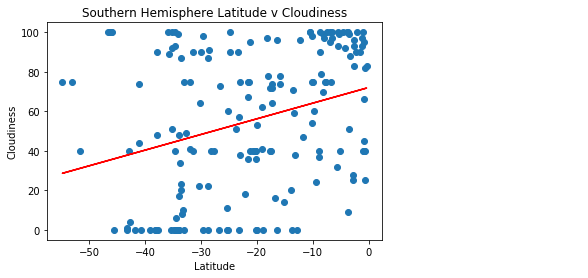

In [78]:
#linear regression southern hemisphere latitude v cloudiness
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and cloudiness.')

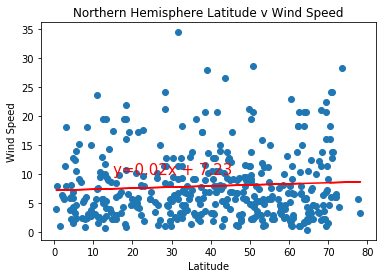

In [79]:
#linear regression northern hemisphere latitude v wind speed
x_values = north['Lat']
y_values = north['Wind Speeds']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and wind speed.')

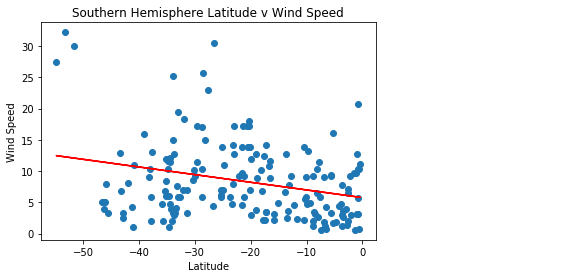

In [80]:
#linear regression southern hemisphere latitude v wind speed
x_values = south['Lat']
y_values = south['Wind Speeds']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and wind speed.')